UNIVARIATE DATASET:

    X       Y

    0      0.2

    0.5    0.78

    1      0.89

    1.5    1.2

    2      2.2

    2.5    2.5

    3      2.789

    3.5    4.3


In [ ]:
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
#import dataset manually
x_data=pd.DataFrame(np.array([0,0.5,1,1.5,2,2.5,3,3.5]))
y_data=pd.DataFrame(np.array([ 0.2, 0.78,  0.89, 1.2, 2.2, 2.5, 2.789,4.3]))

In [ ]:
 def polynomial_features(x_data,degree=2):
  x_features = x_data 
  m = x_features.shape[0]
  n = x_features.shape[1]
  ones = np.ones(m)
  col_count = n
  for cols in x_features.columns:
   for i in range(1,degree+1):
    x_features[col_count] = x_features[cols]**(i+1)
    col_count +=1
  x_features.insert(0,'ones',ones)
  return x_features
X_data=pd.DataFrame(polynomial_features(x_data,2))
X_data

,ones,0,1,2
0,1.0,0.0,0.00,0.000
1,1.0,0.5,0.25,0.125
2,1.0,1.0,1.00,1.000
3,1.0,1.5,2.25,3.375
4,1.0,2.0,4.00,8.000
5,1.0,2.5,6.25,15.625
6,1.0,3.0,9.00,27.000
7,1.0,3.5,12.25,42.875


In [ ]:
def polynomial_regression(x_features,y_response,lambda_val,alpha=0.001,iter=80):
  m = x_features.shape[0]
  n = x_features.shape[1]
  RL=[]
  theta = np.ones(n)
  theta = theta.reshape(theta.shape[0],1)
  reg = (1-(alpha*lambda_val/m))
  for i in range(iter):
   HT = x_features.dot(theta)
   R = (HT.values.reshape(y_data.shape) - y_data.values)
   RL.append(((R**2)/(2*m)).sum())
   theta = theta - (alpha*(x_features.T.dot(R))) /m
# Regularise the parameters
   for i in range(0,len(theta)):
    theta.values[i] = (theta.values[i]) * reg
  return iter,RL,theta
res=polynomial_regression(x_data, y_data, 520, 0.00016,100)

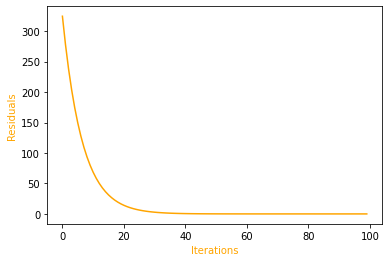

In [ ]:
plt.plot(np.arange(res[0]), res[1],color='orange')
plt.xlabel("Iterations",color='orange')
plt.ylabel("Residuals",color='orange')
plt.show()

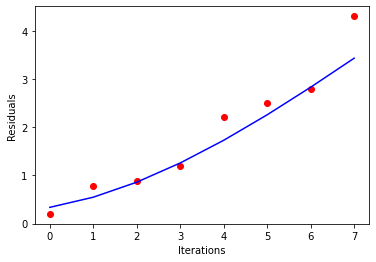

In [ ]:
Yp = X_data.dot(res[2])
plt.plot(np.arange(Yp.shape[0]), Yp,color='b')
plt.scatter(np.arange(Yp.shape[0]), y_data,color='r')
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()